# Lab 8: Boundary value problems (BVPs) in 2D (solutions)

## Exercise 1

### 1.1.

Using the centred $O(h^2)$ numerical differential formulas, we get

$$U_{i+1,j}+U_{i-1,j}+U_{i,j+1}+U_{i,j-1}-4U_{i,j}=h^2(3x_i+2y_j),$$

where we used $h=k$. The stencil is based on the coefficients of the left hand side of the equation, and therefore the same as that presented in the lecture notes (i.e., all elements equal to 1, but the centre one that is equal to -4).


### 1.2.

We use the stencil on each node, leading to the following three equations:

* For $P_1$, with $i=1$ and $j=2$, and therefore $x_1=1/4$ and $y_2=1/2$:$
g_1(0,1/2)+g_2(1/4,3/4)+g_2(1/2,1/2)+U_{2}-4U_{1}=1/16(3/4+1)\ \ \ \rightarrow \ \ \ U_{2}-4U_{1}=-25/64-2e$


* For $P_2$, with $i=1$ and $j=1$, and therefore $x_1=1/4$ and $y_2=1/4$:$\ \ \  g_1(0,1/4)+g_3(1/4,0)+U_{1}+U_3-4U_{2}=1/16(3/4+1/2)\ \ \ \rightarrow \ \ \ U_{1}+U_3-4U_{2}=-27/64 $


* For $P_3$, with $i=2$ and $j=1$, and therefore $x_1=1/2$ and $y_2=1/4$:$\ \ \  g_2(1/2,1/2)+g_3(1/2,1/4)+g_2(3/4,1/4)+U_{2}-4U_{3}=1/16(3/2+1/2)\ \ \ \rightarrow \ \ \ U_{2}-4U_{3}=-3/8-2e $


Using Python (or a simple calculator, or even our own hands!) we find the solution: $U_1=1.6948$, $U_2=0.95188$, $U_3=1.6909$.


### 1.3.

If the condition changes for a Neumann BC, we will have to add 3 new equations accounting for the solution at the boundary. Moreover, we will have to add three further unknowns outside the boundary, for which we need to discretise the BCs.

## Exercise 2

### 2.1.

```(Step by step - to practice for the exam)```


To discretise the equation, we need centred difference expressions for the first and second differentials with error $O(h^2)$, which are:

\begin{align*}
&f'(x_i)\approx\frac{f(x_{i+1})-f(x_{i-1})}{2h},\\
&f''(y_i)\approx\frac{f(y_{i+1})-2f(y_i)+f(y_{i-1})}{k^2}.
\end{align*}

where $h$ and $k$ are the discretisation steps. We now use these expressions in the PDE in a generic point $(x_i,y_i)$ within the domain:


\begin{align*}
&\frac{\partial H_{i,j}}{\partial x}\approx \frac{H_{i+1,j}-H_{i-1,j}}{2h},\\
&\frac{\partial^2 H_{i,j}}{\partial y^2}\approx \frac{H_{i,j+1}-2H_{i,j}+H_{i,j-1}}{k^2},
\end{align*}

where $H_{i,j}=H(x_i,y_j)$, and $h$ and $k$ are the discretisation lengths in the $x$ and $y$ directions, respectively. The discretised equation is then

\begin{align*}
\frac{H_{i+1,j}-H_{i-1,j}}{2h} + \frac{H_{i,j+1}-2H_{i,j}+H_{i,j-1}}{k^2}=0.
\end{align*}


The stencil is given by the coefficients of each component of $H$ in the equation. In this case, it is the same stencil as point 1.1. The truncation error is $O(h^2,k^2)$.


### 2.2.

The main problem with the stencil derived is that it is symmetric. Then, if we use it to present the discretised equations, we will lead to a very large linear system of equations with plenty unknowns. This means that we need to find the parameter H throughout the entire domain, although we are interested in a small part of it. This is not a good way to optimise computational resources to solve the problem.


### 2.3.

We are required to use an approximation for the first differential in the $x$ direction using the actual discretisation point (i.e., the point were we position the stencil) and the point on its left. This results in the use of an $O(h)$ method, the backward difference formula for the first differential.

The formula for the discretisation of the term $\partial H(x_i,y_i)/\partial x$ then changes to

\begin{align*}
&\frac{\partial H_{i,j}}{\partial x}\approx \frac{H_{i,j}-H_{i-1,j}}{h},\\
\end{align*}

leading to

$$
\frac{H_{i,j}-H_{i-1,j}}{h} + \frac{H_{i,j+1}-2H_{i,j}+H_{i,j-1}}{k^2}=0.
$$

The stencil is then given in the figure below. The truncation error is $O(h,k^2)$.

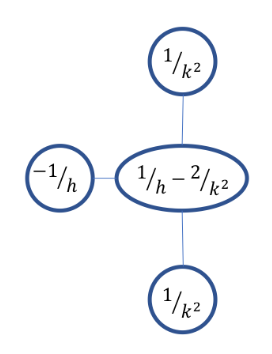

### 2.4.

Using the stencil for the points 1 and 2, we get the following equations:

\begin{align*}
&40+H_2-\frac{3}{2}H_1=0,\\&15+H_1-\frac{3}{2}H_2=0.
\end{align*}

The solution of this system is $H_1=60$ and $H_2=50$.

## Exercise 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import scipy.sparse.linalg as spl

In [2]:
import scipy.sparse as sps

def matrix_A_m(II): # all sides
    sx, sy = np.shape(II) # size of the interior domain
    n = sx * sy # number of unknowns
    # Build the matrix
    d0 = -4 * np.ones(n)
    d1r = np.ones(n-1); d1r[sx-1::sx] = 0; d1r[0::sx] = 2
    d1l = np.ones(n-1); d1l[sx-1::sx] = 0; d1l[sx-2::sx] = 2
    dsr = np.ones(n-sx); dsr[0:sx-1] = 2
    dsl = np.ones(n-sx); dsl[-sx::] = 2
    # solve
    A = sps.diags([d0,d1r,d1l,dsr,dsl], [0,1,-1,sx,-sx], format='csr')
    return A

def vector_b_n(II):
    sx, sy = np.shape(II[1:-1,1::]) # size of the interior domain
    b = np.zeros(sx*sy)
    b[0:sx] = -II[1:-1,0]
    b[-sx::] = -II[1:-1,-1]
    b[0::sx] = b[0::sx] - II[0,1::]
    b[sx-1::sx] = b[sx-1::sx] - II[-1,1::]
    return b

def im_grad(I):
    grad_x = (I[2::,1:-1] - I[0:-2,1:-1]) / 2
    grad_y = (I[1:-1,2::] - I[1:-1,0:-2]) / 2
    return grad_x, grad_y

In [3]:
h, Np = .1, 50 # Np: number of points on each side of the squared domain
I = np.zeros((Np,Np));

# Prepare the system of equations
A = matrix_A_m(I)
b = np.zeros(I.size); b[Np*5+10] = h**2; b[Np*20+10] = -h**2;

y = spl.spsolve(A, b) # solve system of equations
Sol = np.reshape(y, I.shape, order='F')

# Gradient for Neumann solution
x = np.arange(1, Sol.shape[0]-1)
y = np.arange(1, Sol.shape[1]-1)
g_x, g_y = im_grad(Sol)
Mag = np.sqrt(g_x**2+g_y**2);

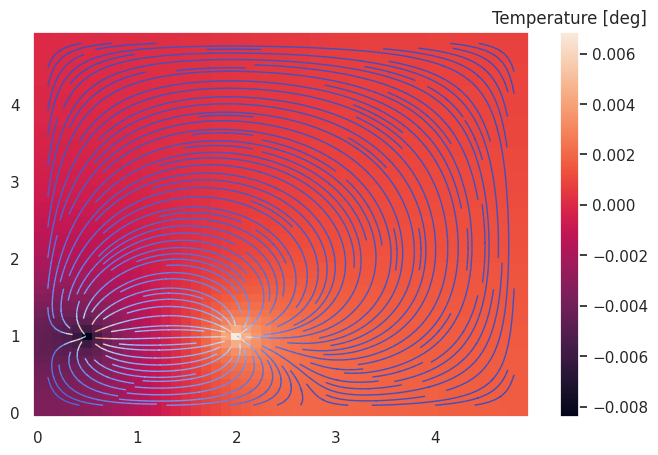

In [4]:
# Plot
v = np.arange(0,I.shape[0])
xx, yy = np.meshgrid(v, v)
plt.figure(figsize=(8,5))
plt.pcolor(h*xx, h*yy, Sol); clb = plt.colorbar(); clb.ax.set_title('Temperature [deg]')
plt.streamplot(x*h, y*h, g_y, g_x, 2, 1, Mag, cmap='coolwarm', arrowsize=0.001, norm=None);